In [22]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')

import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Load data


In [20]:
video = cv2.VideoCapture(os.path.join("..", "data", "raw", "train", "1606b0e6_0.mp4"))
df = pd.read_csv(os.path.join("..", "data", "raw", "train.csv"))

In [21]:
df = df[~df["event"].isin(["start", "end"])]
df

,video_id,time,event,event_attributes
1,1606b0e6_0,201.150,challenge,['ball_action_forced']
4,1606b0e6_0,210.870,challenge,['opponent_dispossessed']
7,1606b0e6_0,219.230,throwin,['pass']
10,1606b0e6_0,224.430,play,"['pass', 'openplay']"
13,1606b0e6_0,229.390,play,"['pass', 'openplay']"
...,...,...,...,...
11206,ecf251d4_0,3041.347,play,"['pass', 'openplay']"
11209,ecf251d4_0,3050.347,play,"['pass', 'openplay']"
11210,ecf251d4_0,3053.067,play,"['pass', 'openplay']"
11213,ecf251d4_0,3056.587,challenge,['opponent_dispossessed']


In [12]:
video.set(cv2.CAP_PROP_POS_MSEC, 201.150000 * 1000)

ret, frame = video.read()

In [17]:
frame_number = video.get(cv2.CAP_PROP_POS_FRAMES)
video.set(cv2.CAP_PROP_POS_FRAMES, frame_number - 5)

ret, frame2 = video.read()

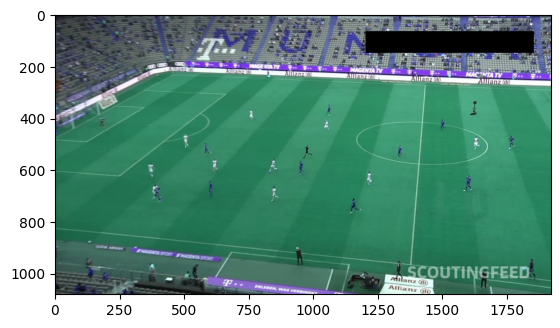

In [13]:
plt.imshow(frame)

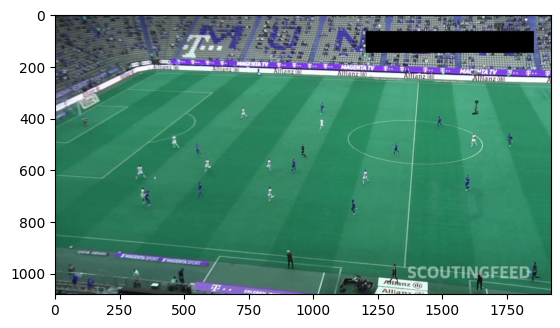

In [18]:
plt.imshow(frame2)

# Create labels


In [35]:
from typing import Literal


def gaussian(x, mu, sig):
    return np.exp(-np.power(x - mu, 2.0) / (2 * np.power(sig, 2.0)))


def create_label(
    frame_number: int,
    window_size: int,
    action: Literal["play", "challenge", "throwin", "nothing"],
) -> dict[str, np.ndarray]:
    values = np.array(range(window_size))
    values = gaussian(values, frame_number, 2.5)
    label = {
        "play": np.zeros(window_size),
        "challenge": np.zeros(window_size),
        "throwin": np.zeros(window_size),
    }

    if action != "nothing":
        label[action] = values

    return label


np.array(list(create_label(15, 16, "challenge").values()))

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.52299797e-08, 1.54975314e-07, 1.34381228e-06, 9.92950431e-06,
        6.25215038e-05, 3.35462628e-04, 1.53381068e-03, 5.97602290e-03,
        1.98410947e-02, 5.61347628e-02, 1.35335283e-01, 2.78037300e-01,
        4.86752256e-01, 7.26149037e-01, 9.23116346e-01, 1.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Create data loaders

In [2]:
import torch

torch.cuda.is_available()

False